In [38]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [25]:
# Load the dataset
df = pd.read_excel('HousePricePrediction.xlsx')


In [26]:
# Step 1: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [28]:
# Step 2: Handle missing values
# Drop rows where the target variable (SalePrice) is missing
df = df.dropna(subset=['SalePrice'])
# Fill missing values in feature columns with the mean (for numeric columns) or mode (for categorical columns)
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numeric columns
        df[col].fillna(df[col].mean(), inplace=True)

# Verify that there are no missing values
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


C:\Users\a8112\AppData\Local\Temp\ipykernel_13632\831693708.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\a8112\AppData\Local\Temp\ipykernel_13632\831693708.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [29]:
# Step 3: Encode categorical variables
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])



In [30]:
# Step 4: Feature selection
# Calculate the correlation matrix
corr_matrix = df.corr()

# Select the top 5 features most correlated with SalePrice
top_features = corr_matrix['SalePrice'].sort_values(ascending=False).index[1:6]
print("\nTop 5 features most correlated with SalePrice:")
print(top_features)


Top 5 features most correlated with SalePrice:
Index(['TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'Exterior1st'], dtype='object')


In [31]:
# Step 5: Split the data into features (X) and target (y)
X = df[top_features]  # Use only the top features
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Step 6: Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



Model Evaluation:
RMSE: 44972.52234846368
R-squared: 0.7363178942131628


In [35]:
# Step 8: Feature importance
feature_importance = model.feature_importances_
print("\nFeature Importance:")
for feature, importance in zip(top_features, feature_importance):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
TotalBsmtSF: 0.3317
YearBuilt: 0.3511
YearRemodAdd: 0.0701
LotArea: 0.2029
Exterior1st: 0.0442


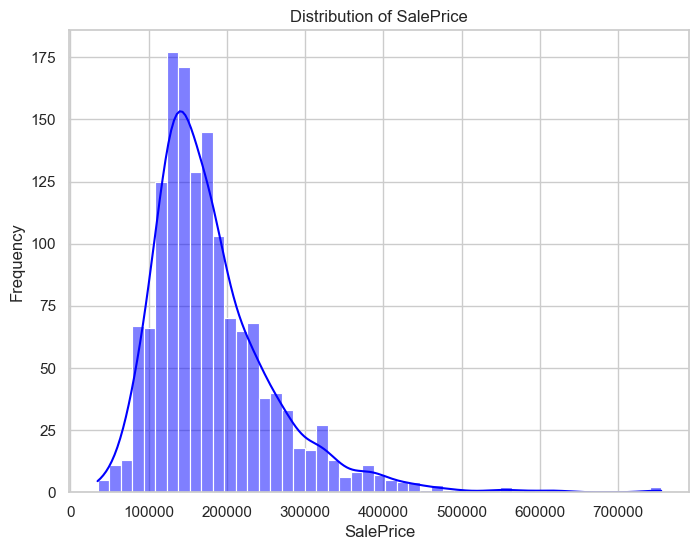

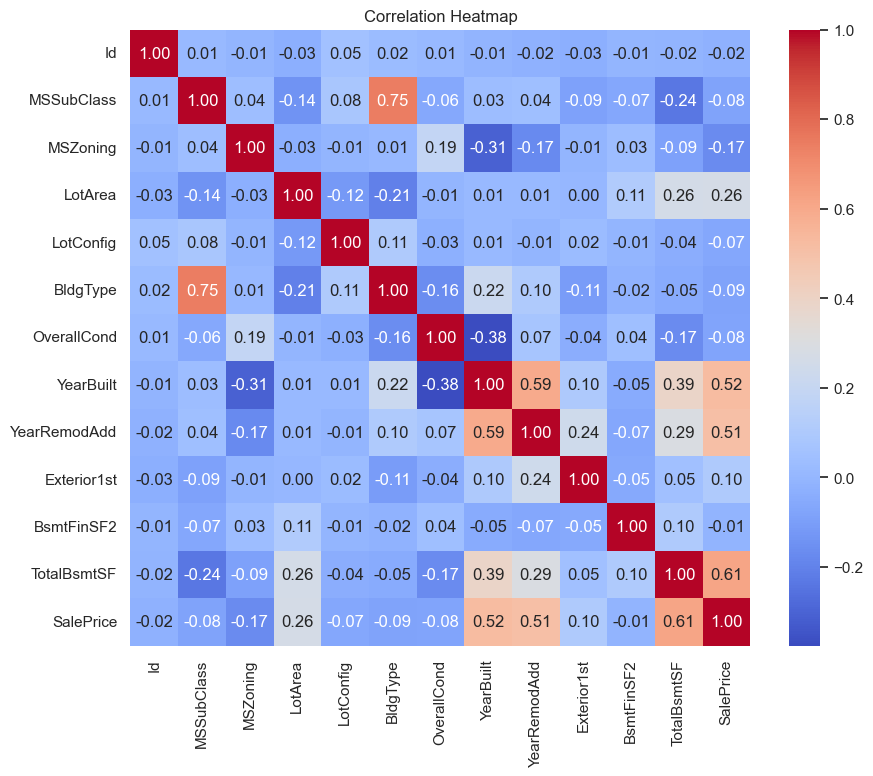

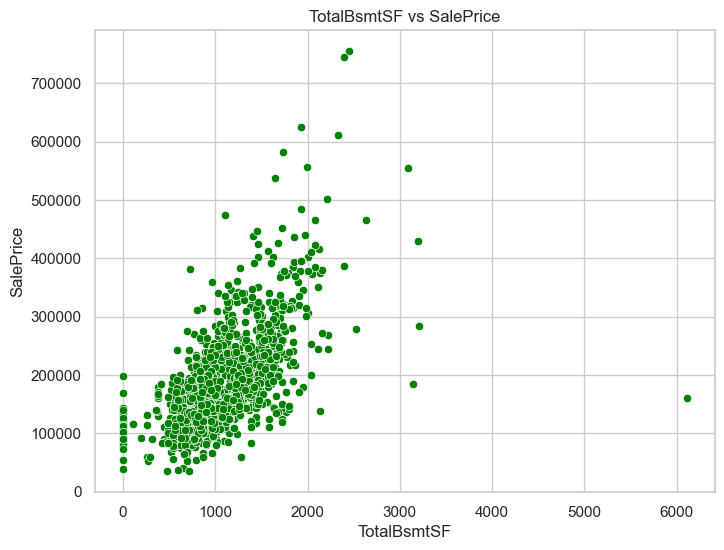

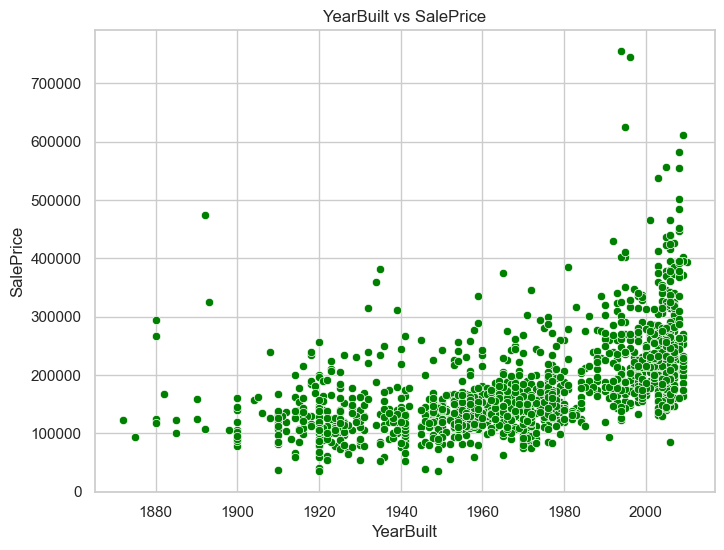

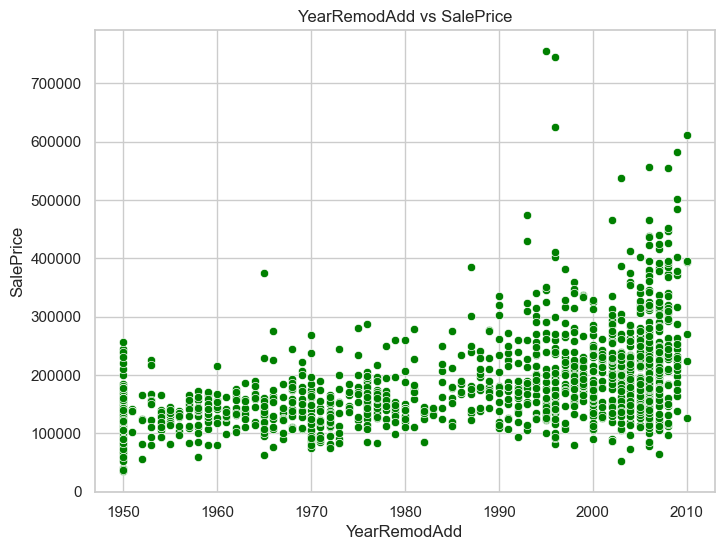

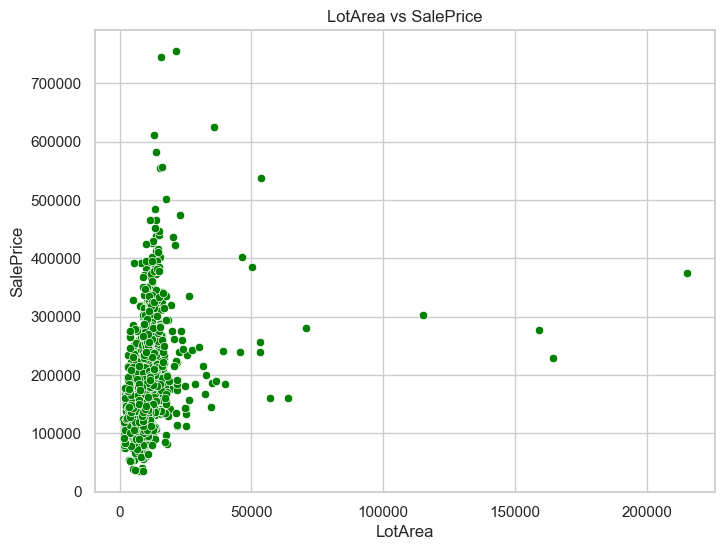

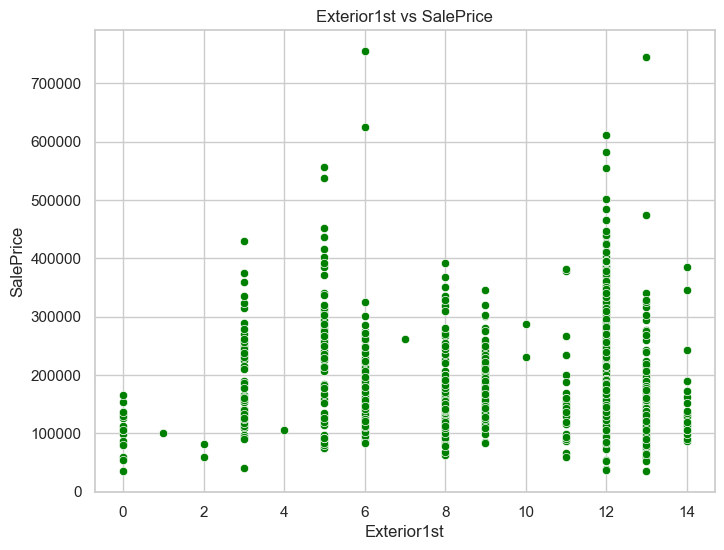

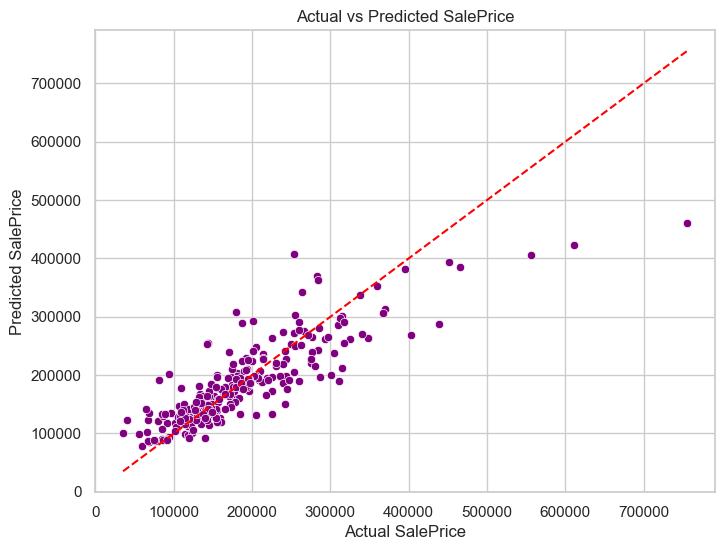

C:\Users\a8112\AppData\Local\Temp\ipykernel_13632\3671844391.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=top_features, palette='viridis')


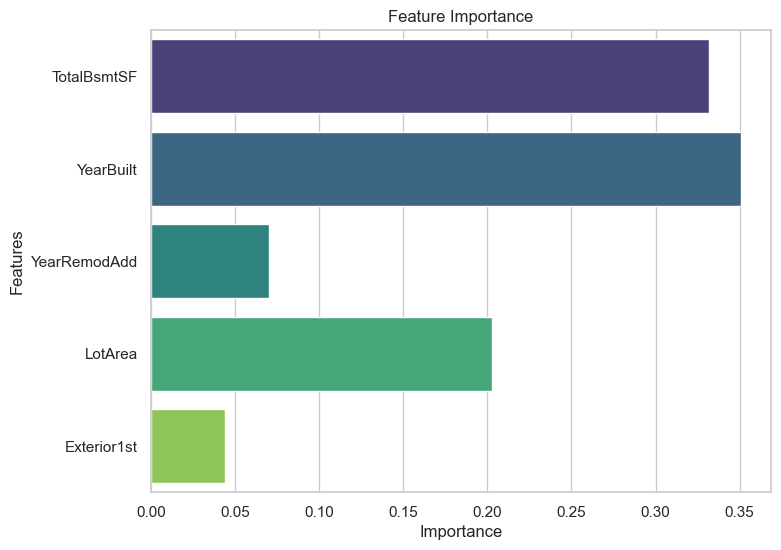

In [39]:
# Step 9: Visualization
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualization 1: Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 3: Scatter Plot of Top Features vs SalePrice
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['SalePrice'], color='green')
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Visualization 4: Actual vs Predicted SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

# Visualization 5: Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=top_features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()